<div align="left">
<table style="width:50%">
  <tr>
    <th>Hazırlayan</th>
    <th>Versiyon</th> 
    <th>Tarih (YY.AA.GG)</th> 
    <th>Dil</th>
  </tr>
  <tr>
    <td>dataFLOYD</td>
    <td>v1.00</td> 
    <td>22.08.2018</td>
    <td>TR</td>
  </tr>
</table>
</div>

# Veri Biliminin Temelleri – Doğrusal regresyon (Linear Regression) nedir?

Bu yazımızda sizlere **Doğrusal Regresyon (Linear Regression)** nedir onu en basit haliyle ve uygulamalı olarak anlatmaya çalışacağım. Tabi başlangıçta biraz geyik yapmak hakkım, o kadar uğraşıyoruz sizler için :)

<div class="alert alert-warning">
İnsan doğası gereği gördükleri şeylerde bir örüntü (pattern) arar ve dağınık noktaları mutlaka birleştirirler. Bunun en güzel örneği binlerce yıldır insanların geceleri gökyüzüne bakınca gördükleri yıldızları birleştirmesi ve bunlara çeşitli isimler vermesidir. En çok bilinen yıldız kümelerinden biri kutup yıldızına da ev sahipliği yapan küçük ayıdır.
</div>

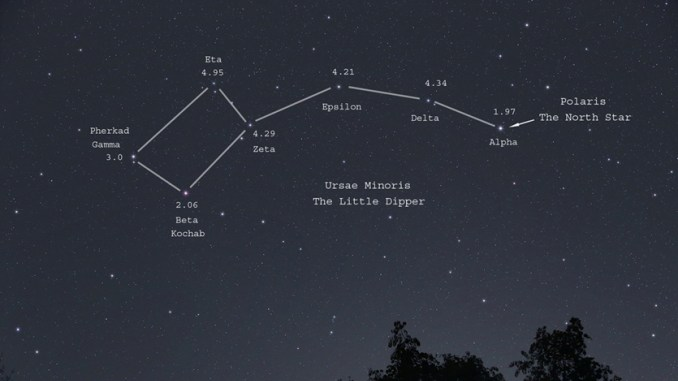

In [1]:
from IPython.display import Image
Image(filename='UrsaMinor.jpg')
# "Ursa Minor by John Chumack [www.galacticimages.com]"

<div class="alert alert-warning">
Yani anlayacağınız insanlar noktalara bakıp doğru çizmeye bayılırlar :) Özellikle çocuklarda bunu çok daha iyi bir şekilde gözlemlersiniz. Çocuk boyama kitapları<
nın çoğunda noktaları birleştirme egzersizleri vardır.
</div>

---------------

<div class="alert alert-info">
<b>Soru :</b> Hemen bir doğrusal regresyon örneği yapsak nasıl olur? 
</div>

<div class="alert alert-success">
<b>Cevap :</b> Tamam yapalım ama öncesinde bir tanım vermek gerekir. Doğrusal regresyonu iki ana başlık altında inceleyebiliriz: <br><br>
1-Basit doğrusal regresyon: İki sürekli değişken arasındaki ilişkiyi incelememize yarayan bir yöntemdir. Bu ilişki genellikle bir doğru denkleminin incelenmesi yoluyla yapılır. Bu durumda tek bir tahmin edici (predictor,x)  ve tek bir tepki (response,y) değişkeni vardır
<br>
2-Çoklu doğrusal regresyon: Birden fazla tahmin edici değişken olan durumları bu kategori altında inceleyebiliriz.
<br><br>
Şimdi bu kısa bilgiden sonra basit doğrusal regresyon için python kullanarak bu işi nasıl yapabiliriz bakalım. Python kullanarak bu işi yapabilmenin çeşitli yöntemleri var bunlar şu şekildedir:

<br><br>
-numpy kullanarak
<br>
-scipy kullanarak
<br>
-scikit-learn kullanarak
<br>

</div>



<div class="well">
Hemen hemen hepiniz bir "scatter plot" ne demek biliyorsunuzdur diye tahmin ediyorum. Bilmeyenler için aşağıda ufak bir örneğini göstermek istiyorum. İki değişkenimiz olduğunu varsaylım. Bu değişkenlere ait her bir noktayı iki boyutlu koordinat düzlemi üzerinde noktaları birbirine bağlamadan gösterirsek buna "scatter plot" deriz.
</div>

<IPython.core.display.Javascript object>


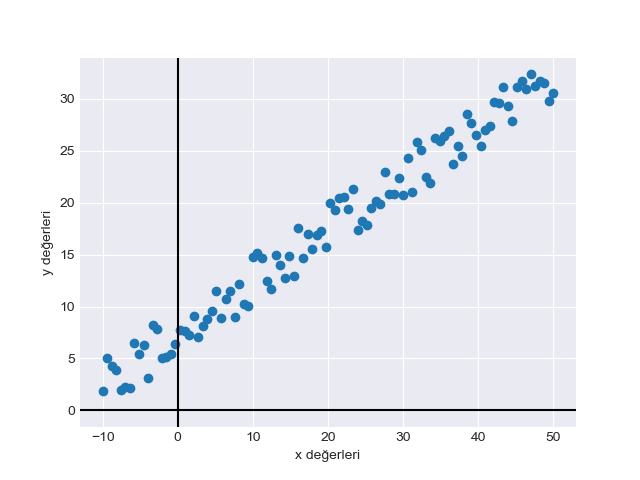

In [2]:
%matplotlib notebook
# Numpy nümerik hesap kütüphanesi
import numpy as np

# Matplotlib grafik çizim kütüphanesi
import matplotlib.pyplot as plt
# Seaborn dark theme tercihimizdir :)
import seaborn as sns
sns.set_style("darkgrid")

# x noktalarını rastgele seçelim
a = 0.5
b = 5
noise = 5
# Toplam nokta sayısı
N = 100

# Hep aynı değerleri oluşturması için seed değerini sabitleyelim
np.random.seed(42)
# x noktaları 1'den 50'ye kadar artsın
x = np.linspace(-10,50,N)
# y noktaları lineer bir doğrunun üzerine rastgele gürültü eklenmesi ile 
y = (a*x + b) + np.random.rand(len(x))*noise

# Şimdi bunları basitçe çizdirelim
plt.scatter(x, y)
plt.xlabel("x değerleri")
plt.ylabel("y değerleri")

# x=0 ve y=0 eksenlerini çizelim
plt.axhline(0, color='black')
plt.axvline(0, color='black');


<div class="well">
Şimdi yukarıda hazırladığımız veriyi kullanarak örneklerimizi yapmaya başlayalım.
</div>

<button type="button" class="btn btn-danger">NUMPY</button> kullanarak lineer regresyon

<IPython.core.display.Javascript object>


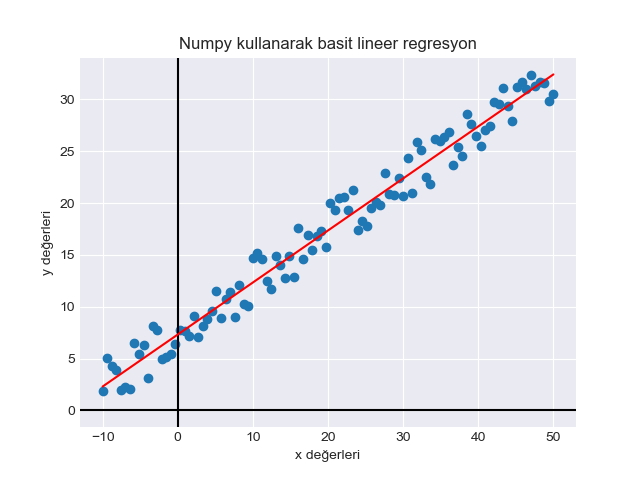

a: 0.50 b: 7.32 


In [3]:
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.figure()

# Şimdi bunları basitçe çizdirelim
plt.scatter(x, y)
plt.xlabel("x değerleri")
plt.ylabel("y değerleri")

# x=0 ve y=0 eksenlerini çizelim
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.plot(x, m*x + c, 'r', label='Fitted line');

plt.title("Numpy kullanarak basit lineer regresyon");

print("a: %.2f b: %.2f " % (m,c))

<button type="button" class="btn btn-success">SCIPY</button> kullanarak lineer regresyon

<IPython.core.display.Javascript object>


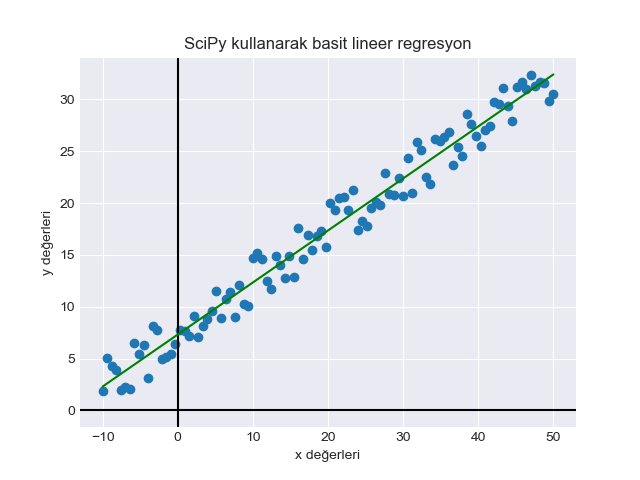

a: 0.50 b: 7.32 


In [4]:
# Scipy kütüphanesinde stats modülünü çağırıyoruz
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

plt.figure()
# Şimdi bunları basitçe çizdirelim
plt.scatter(x, y)
plt.xlabel("x değerleri")
plt.ylabel("y değerleri")

# x=0 ve y=0 eksenlerini çizelim
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.plot(x, slope*x + intercept, 'g', label='Fitted line');

plt.title("SciPy kullanarak basit lineer regresyon");

print("a: %.2f b: %.2f " % (slope,intercept))

<button type="button" class="btn btn-warning">SCKIT-LEARN</button> kullanarak lineer regresyon

<IPython.core.display.Javascript object>


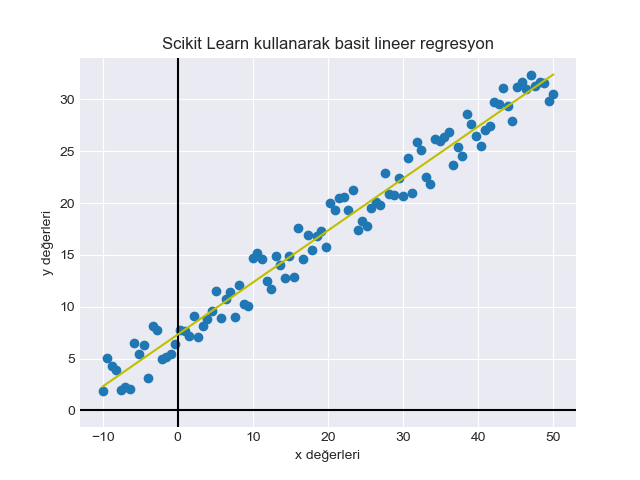

a: 0.50 b: 7.32 


In [5]:
from sklearn import linear_model

# Lineer regresyon nesnesi yaratılıyor
lr = linear_model.LinearRegression()
# Veriler kullanılarak parametreler hesaplanıyor
lr.fit(x.reshape(-1,1), y)

plt.figure()
# Şimdi bunları basitçe çizdirelim
plt.scatter(x, y)
plt.xlabel("x değerleri")
plt.ylabel("y değerleri")

# x=0 ve y=0 eksenlerini çizelim
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.plot(x, lr.coef_*x + lr.intercept_, 'y', label='Fitted line');

plt.title("Scikit Learn kullanarak basit lineer regresyon");

print("a: %.2f b: %.2f " % (lr.coef_,lr.intercept_))

----------------

<div class="alert alert-info">
<b>Soru :</b> Yukarıdaki örneklerden anladığım kadarıyla biz en iyi doğruyu oturtmuş olduk gibi görünüyor. Peki durum böyleyse bu oturtuğumuz doğrunun en iyi olduğundan nasıl emin olabiliyoruz?
</div>

<div class="alert alert-success">
<b>Cevap :</b> Güzel bir soru. Buradaki doğruyu oluşturabilmek için doğrunun değerleri ile hataların karesini minimize edecek şekilde a ve b parametrelerini oluşturmaya çalıştık. Hep birlikte bunu görselleştirerek daha iyi anlayalım.
</div>

<div class="well">
Önce çok küçük bir matematik tanımı vermek istiyorum.
Diyelim ki bizim doğru denklemi  $\hat y=ax+b$ şeklinde olsun. Burada y'nin şapkalı olması onun kestirilmiş bir değer olduğunu göstermektedir. Şimdi biz doğru oturtma probleminde a ve b parametrelerini kestirmeye çalışıyoruz. O yüzden eğer bu bir maliyet fonksiyonu yazarsak bunun girdileri a ve b olacaktır. Yani verilen bir a ve b değeri için bu fonksiyonun minimum olduğu yeri bulmalıyız. N  adet noktamız olduğunu varsayarsak:
$$J(a,b)=\frac{1}{N} \sum_{i=1}^N (\hat y_i - y_i)^2$$
$$J(a,b)=\frac{1}{N} \sum_{i=1}^N ((ax_i+b) - y_i)^2$$ <br>
Bu denklemin özeti şu: *Doğrunun x değerlerinde karşılık geldiği değer ile ile gerçek y değerinin arasındaki farkı alıp bunun karelerini topluyoruz. Bunu da normalize edebilmek için toplam örnek sayısına bölüyoruz*
</div>

<IPython.core.display.Javascript object>


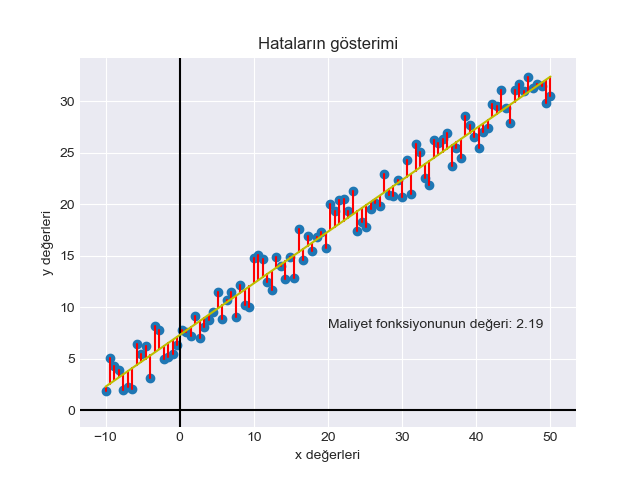

a: 0.50 b: 7.32 


In [6]:
plt.figure()

# y_hat hesaplanıyor
# scikit-learn 
y_hat = lr.coef_*x + lr.intercept_

# maliyet fonksiyonu hesaplanıyor
cost_j = 0
for i in range(len(x)):
    plt.plot([x[i],x[i]],[y_hat[i],y[i]],'r')
    cost_j = cost_j + (y_hat[i]-y[i])**2

plt.text(20,8,"Maliyet fonksiyonunun değeri: %.2f" % (cost_j/len(x)))

# x ve y değerleri çizdiriliyor
plt.scatter(x, y)
plt.xlabel("x değerleri")
plt.ylabel("y değerleri")

# x=0 ve y=0 eksenlerini çizelim
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.plot(x, lr.coef_*x + lr.intercept_, 'y', label='Fitted line')

# Grafiğe başlık koymak için
plt.title("Hataların gösterimi");

# a ve b değerlerini gösterelim
print("a: %.2f b: %.2f " % (lr.coef_[0],lr.intercept_))

<div class="well">
Bu yazımızda Python kullanarak 3 farklı yöntem ile doğrusal regresyonun nasıl yapılacağını gösterdik ve maliyet fonksiyonuna bir giril yapmış olduk. Lineer regresyon konusu oldukça önemli olduğu için ilerleyen zamanlarda bu konuyla ilgili başka yazılar da hazırlamayı düşünüyorum. Önerilerinizi lütfen yorumlar kısmına ekleyiniz.
</div>